<a href="https://colab.research.google.com/github/shihabmohammed8/DL-01-2.0-/blob/main/using%20pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

torch.manual_seed(3)


In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
A = data.data
B = data.target

In [3]:
A_train, A_test, B_train, B_test = train_test_split(
    A, B, test_size=0.2, random_state=3
)

In [4]:
scaler = StandardScaler()
A_train_std = scaler.fit_transform(A_train)
A_test_std = scaler.transform(A_test)

In [5]:
X = torch.tensor(A_train_std, dtype=torch.float32)
y = torch.tensor(B_train, dtype=torch.long)

X_test_tensor = torch.tensor(A_test_std, dtype=torch.float32)
y_test_tensor = torch.tensor(B_test, dtype=torch.long)

In [9]:
full_dataset = TensorDataset(X, y)

val_size = int(0.1 * len(full_dataset))
train_size = len(full_dataset) - val_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [10]:

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = Model()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [12]:
num_epochs = 15

train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    model.eval()
    val_correct = 0
    val_total = 0
    val_loss_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss_total += loss.item()
            _, predicted = torch.max(outputs, 1)

            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_loss_total / len(val_loader)
    val_acc = val_correct / val_total

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/15 | Train Acc: 0.5659, Val Acc: 0.7556
Epoch 2/15 | Train Acc: 0.7951, Val Acc: 0.9111
Epoch 3/15 | Train Acc: 0.8854, Val Acc: 0.9778
Epoch 4/15 | Train Acc: 0.9220, Val Acc: 0.9778
Epoch 5/15 | Train Acc: 0.9268, Val Acc: 0.9778
Epoch 6/15 | Train Acc: 0.9415, Val Acc: 0.9556
Epoch 7/15 | Train Acc: 0.9463, Val Acc: 0.9556
Epoch 8/15 | Train Acc: 0.9463, Val Acc: 0.9556
Epoch 9/15 | Train Acc: 0.9463, Val Acc: 0.9556
Epoch 10/15 | Train Acc: 0.9537, Val Acc: 0.9556
Epoch 11/15 | Train Acc: 0.9537, Val Acc: 0.9556
Epoch 12/15 | Train Acc: 0.9561, Val Acc: 0.9556
Epoch 13/15 | Train Acc: 0.9585, Val Acc: 0.9778
Epoch 14/15 | Train Acc: 0.9634, Val Acc: 0.9778
Epoch 15/15 | Train Acc: 0.9683, Val Acc: 0.9778


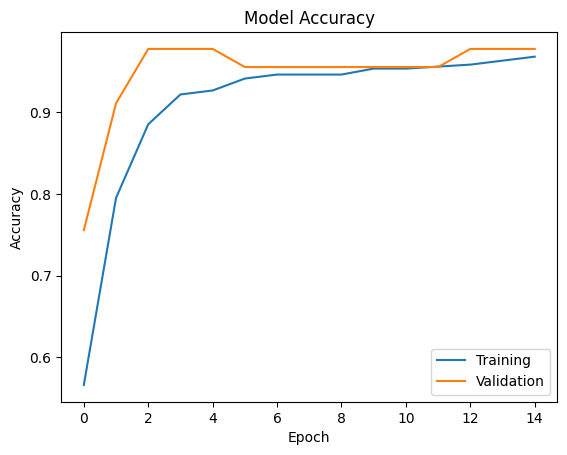

In [13]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()


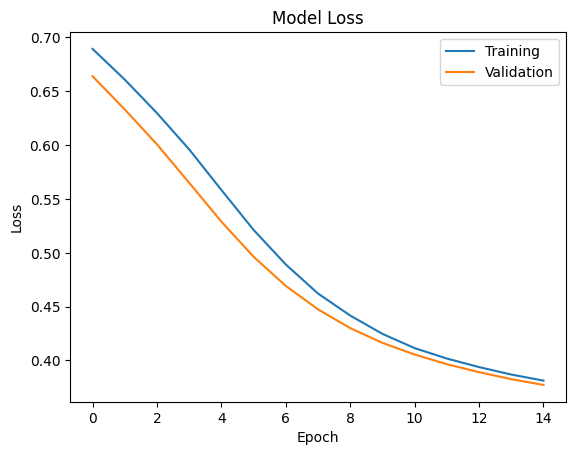

In [14]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()


In [15]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, preds = torch.max(outputs, 1)

test_acc = (preds == y_test_tensor).sum().item() / len(y_test_tensor)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9473684210526315


In [17]:
import torch

my_list = [1, 0.96]
tensor_list = torch.tensor(my_list)

index_of_max_value = torch.argmax(tensor_list).item()

print(my_list)
print(index_of_max_value)


[1, 0.96]
0


In [19]:
B_pred = model(X_test_tensor)   # from PyTorch model


In [20]:
_, B_pred_labels = torch.max(B_pred, 1)
B_pred_labels = B_pred_labels.tolist()

print(B_pred_labels)


[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]


In [21]:
import numpy as np
import torch

input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,
              0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,
              0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,
              0.2433,0.06563)

input_data_np = np.asarray(input_data).reshape(1, -1)

input_data_std = scaler.transform(input_data_np)

input_tensor = torch.tensor(input_data_std, dtype=torch.float32)


In [23]:
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_label = torch.max(output, 1)

print("Predicted class:", predicted_label.item())

if predicted_label.item() == 1:
    print("Malignant")
else:
    print("Benign")



Predicted class: 1
Malignant
